<a href="https://colab.research.google.com/github/TheDarkKnight537/Data_Visualization/blob/main/ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Processing image: cycle.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


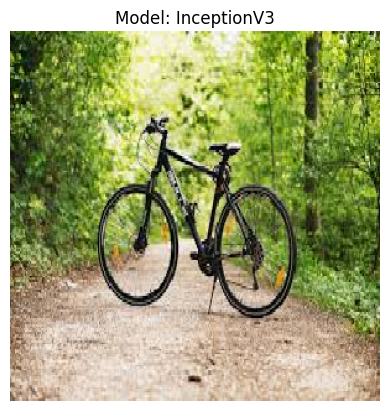

Top predictions for InceptionV3:
1: mountain_bike (74.57%)
2: bicycle-built-for-two (5.37%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


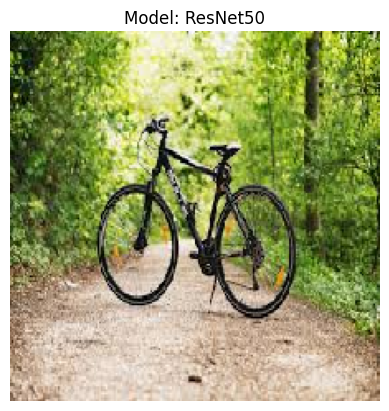

Top predictions for ResNet50:
1: mountain_bike (83.31%)
2: bicycle-built-for-two (13.32%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


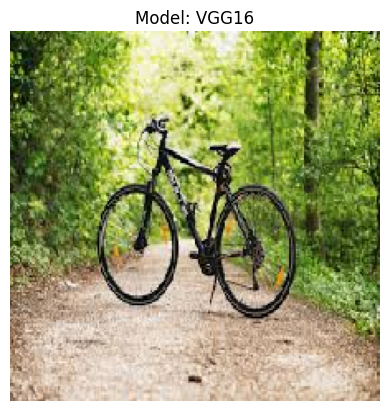

Top predictions for VGG16:
1: mountain_bike (93.72%)
2: bicycle-built-for-two (1.81%)

Processing image: fish.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


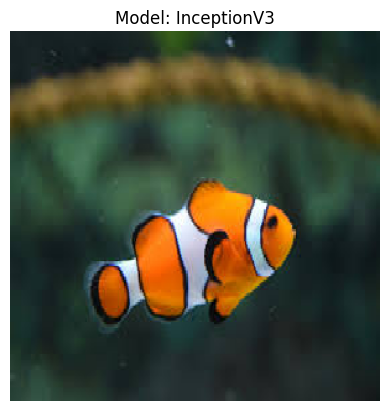

Top predictions for InceptionV3:
1: anemone_fish (74.78%)
2: rock_beauty (4.34%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


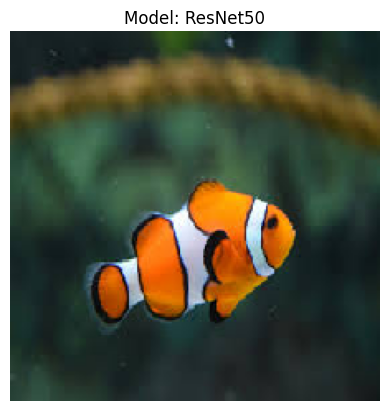

Top predictions for ResNet50:
1: anemone_fish (46.29%)
2: rock_beauty (26.79%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


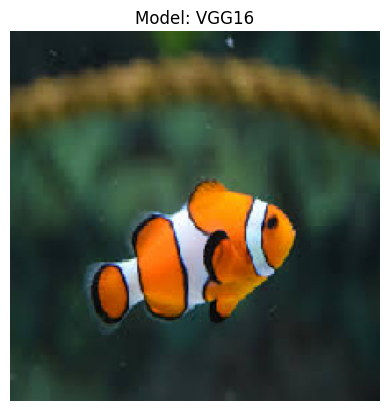

Top predictions for VGG16:
1: anemone_fish (99.45%)
2: rock_beauty (0.15%)


In [19]:
from tensorflow.keras.applications import InceptionV3, ResNet50, VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet, decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def load_and_preprocess_image(img_path, target_size, preprocess_function):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_function(img_array), img

# Predict and decode
def predict_and_display(model, img, img_disp, model_name):
    predictions = model.predict(img)
    decoded_predictions = decode_predictions(predictions, top=2)[0]

    # Display the image
    plt.imshow(img_disp)
    plt.axis('off')
    plt.title(f"Model: {model_name}")
    plt.show()

    # Display top 2 predictions with percentages
    print(f"Top predictions for {model_name}:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# Paths to your sample images
img_path1 = 'cycle.jpeg'
img_path2 = 'fish.jpeg'

# Load pretrained models
inception_model = InceptionV3(weights='imagenet')
resnet_model = ResNet50(weights='imagenet')
vgg_model = VGG16(weights='imagenet')

# Preprocess images for each model and make predictions
for img_path in [img_path1, img_path2]:
    print(f"\nProcessing image: {img_path}")

    # InceptionV3
    img_inception, img_disp_inception = load_and_preprocess_image(img_path, (299, 299), preprocess_inception)
    predict_and_display(inception_model, img_inception, img_disp_inception, 'InceptionV3')

    # ResNet50
    img_resnet, img_disp_resnet = load_and_preprocess_image(img_path, (224, 224), preprocess_resnet)
    predict_and_display(resnet_model, img_resnet, img_disp_resnet, 'ResNet50')

    # VGG16
    img_vgg, img_disp_vgg = load_and_preprocess_image(img_path, (224, 224), preprocess_vgg)
    predict_and_display(vgg_model, img_vgg, img_disp_vgg, 'VGG16')